In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load cleaned data
df = pd.read_csv("../data/processed/liar_cleaned.csv")

# Features and Labels
X = df['cleaned_text']
y = df['label']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_tfidf, y_train)

# Predict
y_pred = svm.predict(X_test_tfidf)


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.50      0.54      1136
           1       0.64      0.71      0.67      1423

    accuracy                           0.62      2559
   macro avg       0.61      0.60      0.60      2559
weighted avg       0.61      0.62      0.61      2559



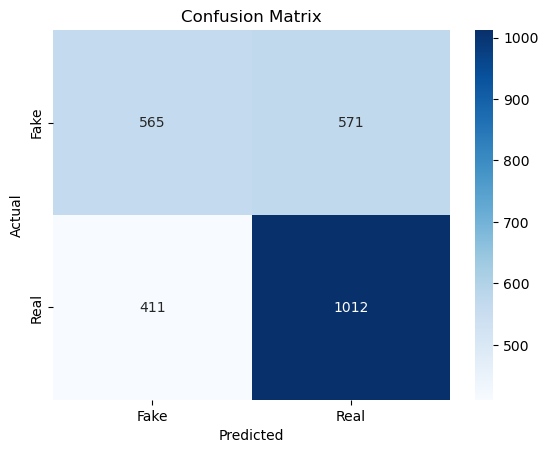

In [4]:
# Evaluation Report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
# Save model and vectorizer for later use
joblib.dump(svm, "../models/svm_tfidf_model.pkl")
joblib.dump(tfidf, "../models/tfidf_vectorizer.pkl")

print("✅ SVM model and TF-IDF vectorizer saved!")


✅ SVM model and TF-IDF vectorizer saved!
